In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load stock file
sp1500 = "resources/S&P1500_Sector_All.csv"
sp1500 = pd.read_csv(sp1500) 

# Display the data table for preview
sp1500.head()

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,1/1/2014,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,1/2/2014,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,1/3/2014,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


In [2]:
# Rename columns

# Old code
# sp1500.columns = ['Date', 'Consumer_Discretionary', 'Communication_Services', 'Consumer_Staples', 
#                      'Energy', 'Financials', 'Health_Care', 'Industrials', 'Information_Technology',
#                      'Materials', 'Real_Estate', 'Utilities']

# New code
# Fix columns with slightly different formatting, to make all uniform (i.e., Communication and Real Estate cols)
sp1500.columns = sp1500.columns.str.replace('-SEC','- SEC').str.replace('1500 /','1500')

# Delete all special characters by replacing with empty string
sp1500.columns = sp1500.columns.str.replace(r'(','').str.replace(r')','')

# Remove remaining text we don't want
sp1500.columns = sp1500.columns.str.replace('INDEX S&P Composite 1500 ','').str.replace(' - SEC - Total Return ','')
sp1500.columns = sp1500.columns.str.replace('   ','') # replaces 3 back to back spaces left over after removing other text

# Replace space with underscore for ease of referencing column later on
# sp1500.columns = sp1500.columns.str.replace(' ','_')

# Display the data table to see new columns
sp1500.head()

,Date,Consumer Discretionary,Communication Services,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,1/1/2014,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,1/2/2014,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,1/3/2014,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


In [3]:
# Split table into 5 year tables

# Reformat date column into recognizable date for splitting
sp1500['Date'] = pd.to_datetime(sp1500['Date'])

# Creation of 5 tables, with line for resetting index for each
sp1500_2014 = sp1500[(sp1500['Date'] >= '1/1/2014') & (sp1500['Date'] <= '12/31/2014')]
sp1500_2014 = sp1500_2014.reset_index(drop=True)

sp1500_2015 = sp1500[(sp1500['Date'] >= '1/1/2015') & (sp1500['Date'] <= '12/31/2015')]
sp1500_2015 = sp1500_2015.reset_index(drop=True)

sp1500_2016 = sp1500[(sp1500['Date'] >= '1/1/2016') & (sp1500['Date'] <= '12/31/2016')]
sp1500_2016 = sp1500_2016.reset_index(drop=True)

sp1500_2017 = sp1500[(sp1500['Date'] >= '1/1/2017') & (sp1500['Date'] <= '12/31/2017')]
sp1500_2017 = sp1500_2017.reset_index(drop=True)

sp1500_2018 = sp1500[(sp1500['Date'] >= '1/1/2018') & (sp1500['Date'] <= '12/31/2018')]
sp1500_2018 = sp1500_2018.reset_index(drop=True)

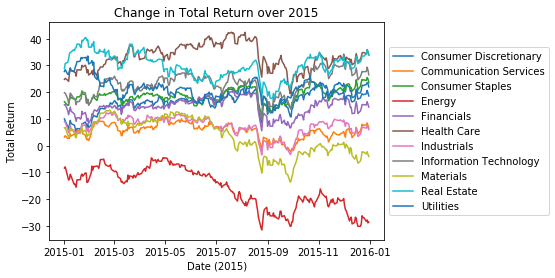

In [6]:
for x in range(1, 12):
    plt.plot(sp1500_2015['Date'], sp1500_2015.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2015)')
plt.title('Change in Total Return over 2015')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()